<a href="https://colab.research.google.com/github/ArcanjoMJA/Iniciante-1/blob/main/fronteira_aula_(1)_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Grupos de até 5 alunos
# Escolher Ações de 5 setores
# Cada setor 4 ações
# ppt com as conclusões no max 10 slides

In [1]:
# Load Packages
!pip install yfinance
import numpy as np
import pandas as pd
#from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [2]:
# Import data
df = yf.download(['ITUB4.SA', 'VALE3.SA', 'MGLU3.SA', 'B3SA3.SA'],start='2018-01-01', end='2023-05-25')
df.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                     Close             \
            B3SA3.SA   ITUB4.SA  MGLU3.SA   VALE3.SA  B3SA3.SA   ITUB4.SA   
Date                                                                        
2018-01-02  6.221113  23.113794  2.390915  28.455339  7.636666  29.253332   
2018-01-03  6.327015  23.271833  2.360765  28.284828  7.766666  29.453333   
2018-01-04  6.367747  23.756433  2.417448  28.400776  7.816666  30.066666   
2018-01-05  6.460071  23.824917  2.369810  28.844109  7.930000  30.153334   
2018-01-08  6.489943  23.745903  2.370111  29.485243  7.966666  30.053333   

                                     High             ...       Low  \
            MGLU3.SA   VALE3.SA  B3SA3.SA   ITUB4.SA  ...  MGLU3.SA   
Date                                                  ...             
2018-01-02  2.478125  41.720001  7.780000  29.253332  ...  2.450312   
2018-01-03  2.446875  41.470001  7.806666  29.559999  ...  2.422500   
2018-01-04  2.505625  41.639999  7.866666  30.200001  ...  2.478125   
2018-01-05  2.456250  42.290001  7.930000  30.213333  ...  2.448437   
2018-01-08  2.456562  43.230000  8.060000  30.213333  ...  2.448437   

                           Open                                    Volume  \
             VALE3.SA  B3SA3.SA   ITUB4.SA  MGLU3.SA   VALE3.SA  B3SA3.SA   
Date                                                                        
2018-01-02  40.439999  7.630000  28.533333  2.528125  40.439999  29013300   
2018-01-03  41.299999  7.583333  29.266666  2.468750  41.830002  18920100   
2018-01-04  41.520000  7.790000  29.500000  2.500000  41.810001  16965300   
2018-01-05  41.310001  7.800000  30.080000  2.514062  41.570000  21964800   
2018-01-08  42.400002  7.916666  30.040001  2.453125  42.400002  20775600   

                                          
            ITUB4.SA  MGLU3.SA  VALE3.SA  
Date                                      
2018-01-02  16650900  59427200  14156500  
2018-01-03  22295700  41385600  12744200  
2018-01-04  23222550  47936000  18433000  
2018-01-05  15717450  30684800  15251300  
2018-01-08  12708150  28796800  14542800  

[5 rows x 24 columns]

In [3]:
# Closing price
df = df['Adj Close'].dropna()
df.head()

,B3SA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA
Date,,,,
2018-01-02,6.221113,23.113794,2.390915,28.455339
2018-01-03,6.327015,23.271833,2.360765,28.284828
2018-01-04,6.367747,23.756433,2.417448,28.400776
2018-01-05,6.460071,23.824917,2.369810,28.844109
2018-01-08,6.489943,23.745903,2.370111,29.485243


In [4]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,B3SA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA
B3SA3.SA,1.000000,0.564259,0.517814,0.295251
ITUB4.SA,0.564259,1.000000,0.342398,0.330460
MGLU3.SA,0.517814,0.342398,1.000000,0.236082
VALE3.SA,0.295251,0.330460,0.236082,1.000000


In [5]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

B3SA3.SA    0.183574
ITUB4.SA   -0.005112
MGLU3.SA    0.252425
VALE3.SA    0.165656
dtype: float64

In [6]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

B3SA3.SA    0.417347
ITUB4.SA    0.336052
MGLU3.SA    0.631681
VALE3.SA    0.403497
dtype: float64

In [7]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets

,0,1
B3SA3.SA,0.183574,0.417347
ITUB4.SA,-0.005112,0.336052
MGLU3.SA,0.252425,0.631681
VALE3.SA,0.165656,0.403497


In [8]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [9]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [10]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [11]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,B3SA3.SA weight,ITUB4.SA weight,MGLU3.SA weight,VALE3.SA weight
0,0.126741,0.302806,0.232533,0.318633,0.130582,0.318252
1,0.140933,0.348150,0.260683,0.324692,0.300253,0.114371
2,0.208425,0.434552,0.496040,0.026674,0.442975,0.034311
3,0.154404,0.334601,0.395720,0.211140,0.204149,0.188991
4,0.122911,0.302852,0.143290,0.343690,0.154185,0.358834


<Axes: xlabel='Volatility', ylabel='Returns'>

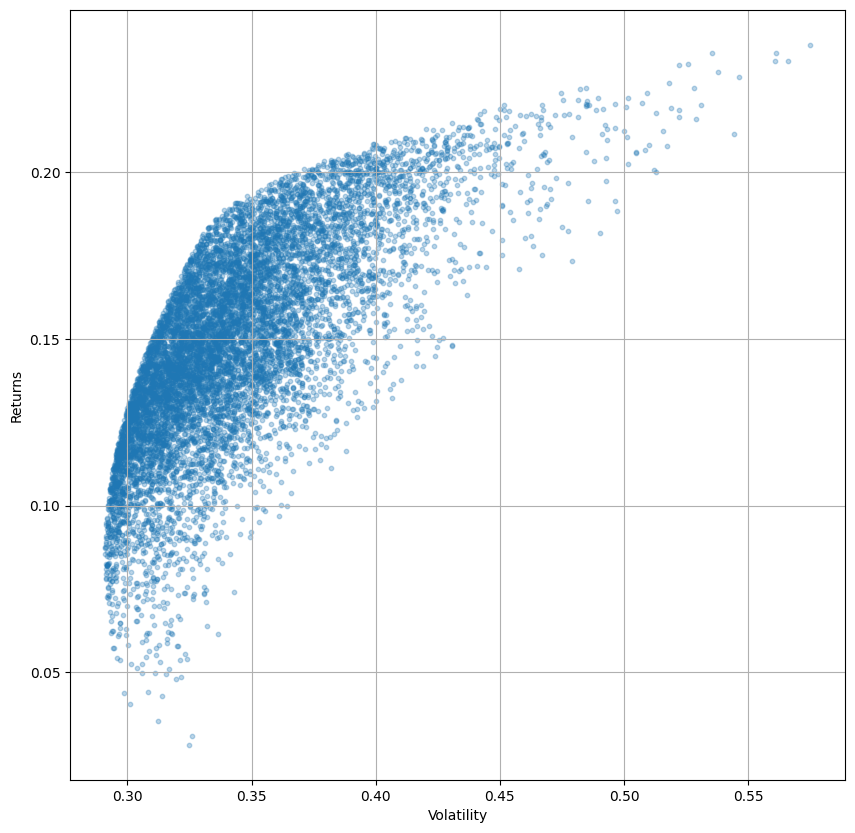

In [12]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [13]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns            0.087447
Volatility         0.291093
B3SA3.SA weight    0.151792
ITUB4.SA weight    0.489558
MGLU3.SA weight    0.030792
VALE3.SA weight    0.327859
Name: 206, dtype: float64

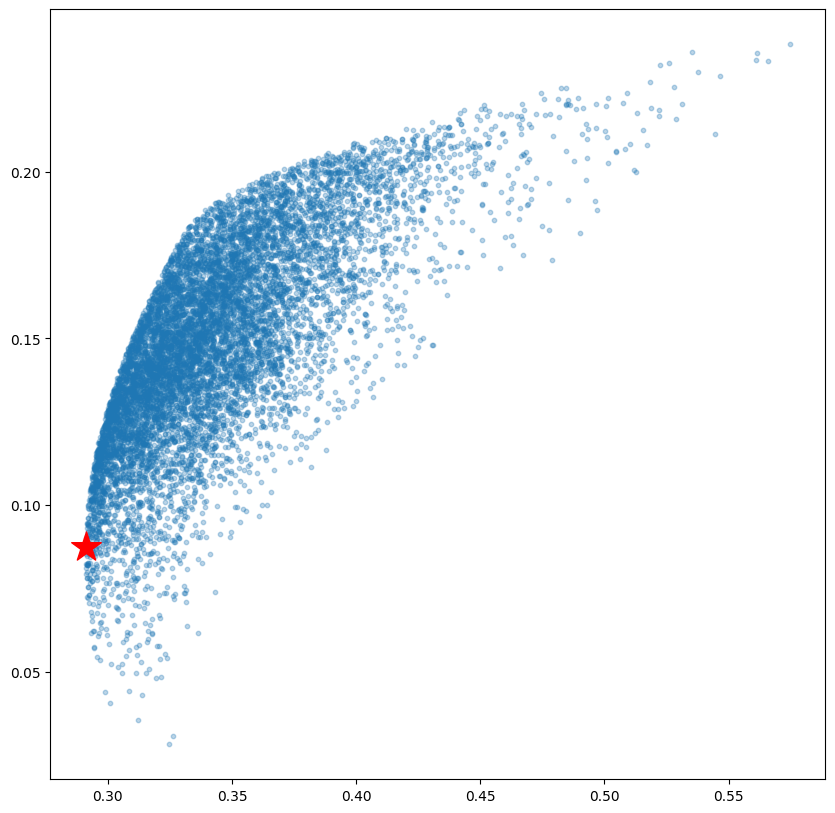

In [14]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [15]:
# Finding the optimal portfolio
rf = 0.1375 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns            0.235819
Volatility         0.535459
B3SA3.SA weight    0.056930
ITUB4.SA weight    0.002028
MGLU3.SA weight    0.800854
VALE3.SA weight    0.140188
Name: 4754, dtype: float64

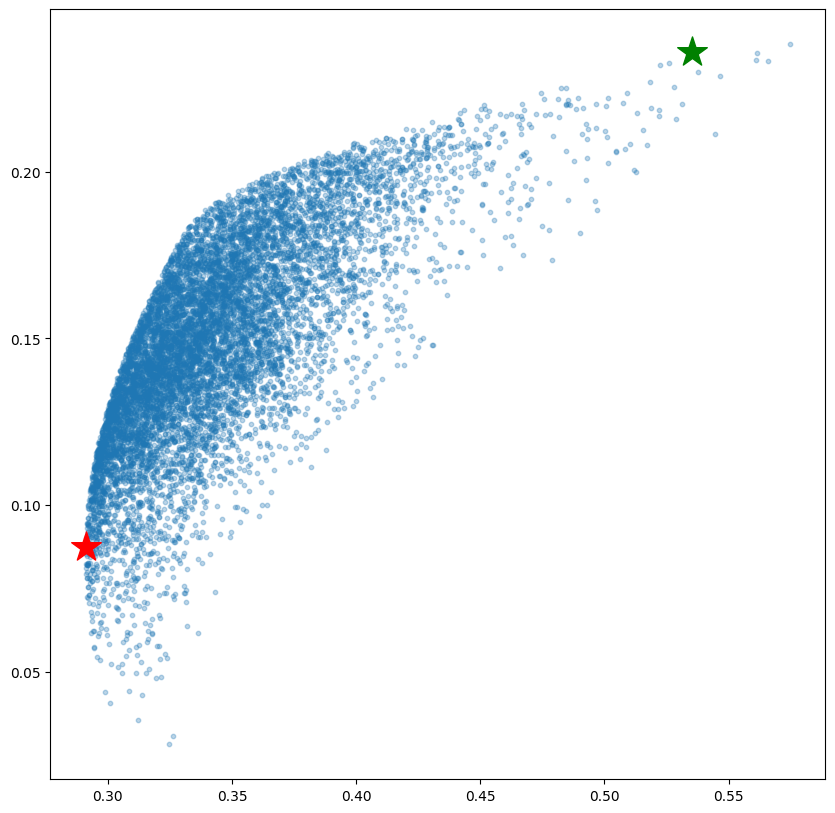

In [19]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)